<a href="https://colab.research.google.com/github/arjun1131/DS-Projects/blob/main/Calorie_Burnt_Prediction_using_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Calories Burnt Prediction using Machine Learning with Python

Aim :
To predict calories burnt during excerise

Steps :
1. Data Collection
2. Data Preprocessing
3. Data Analysis
4. Train - Test Spliting of Data
5. Training ML model(XGB Regressor)
6. Model Evaluation
7. Prediction for new data

#Importing required Libraries 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

#Data Collection

The dataset is taken from Kaggle.<br>
Dataset link : https://www.kaggle.com/fmendes/fmendesdat263xdemos <br>
Dataset comprises of 2 CSV's calories & exercise which 

In [19]:
#Reading CSV data 
calories = pd.read_csv('/content/drive/MyDrive/ML Datasets/calories.csv')

excerise = pd.read_csv('/content/drive/MyDrive/ML Datasets/exercise.csv')

In [20]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [21]:
excerise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [22]:
#Joining 2 dataframes 
data = pd.concat([excerise , calories['Calories']],axis = 1)

In [23]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [24]:
#Finding how many datapoint we have
data.shape

(15000, 9)

In [25]:
#Basic Info about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [26]:
#By inferring basic info , we can find there is no null values in dataset.
#Another way of checking null values as follows
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

#Data Analysis

In [27]:
#Statistics Measures
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


#Data Visualization

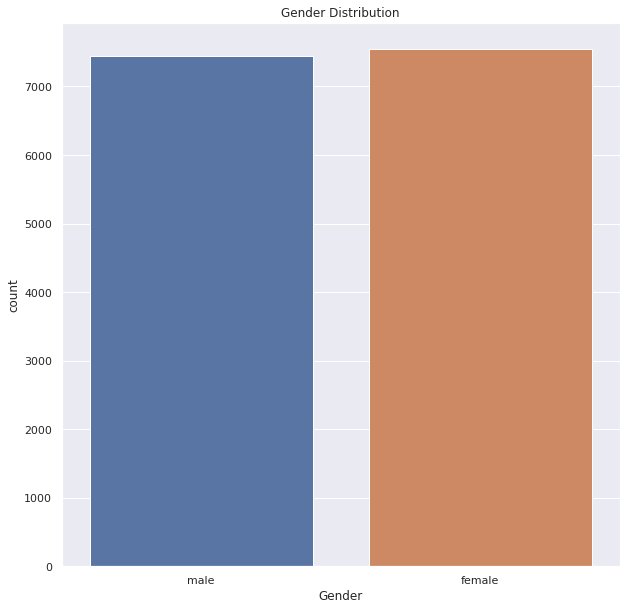

In [37]:
#Gender Distribution
sns.set()
plt.figure(figsize = (10,10))
sns.countplot(x = 'Gender', data = data)
plt.title('Gender Distribution')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


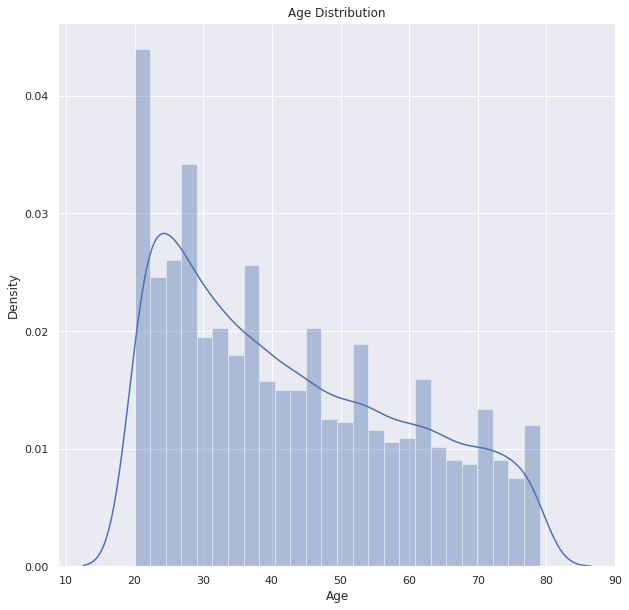

In [41]:
#Age Distribution
plt.figure(figsize = (10,10))
sns.distplot(data['Age'])
plt.title("Age Distribution")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


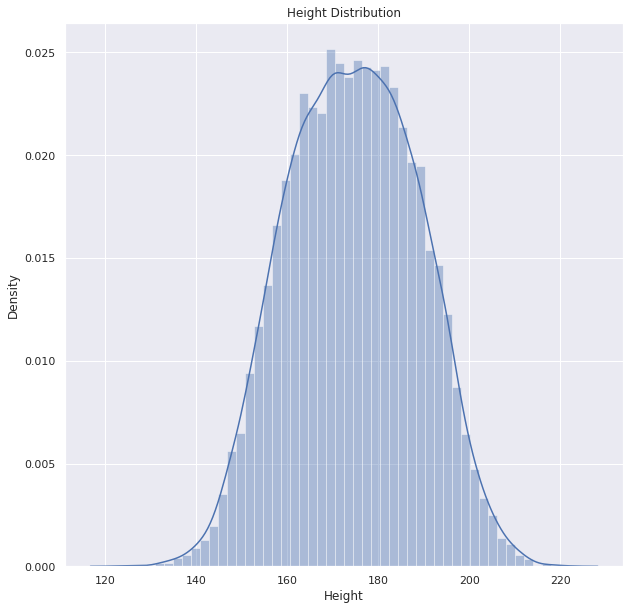

In [43]:
#Height Distribution
plt.figure(figsize = (10,10))
sns.distplot(data['Height'])
plt.title('Height Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


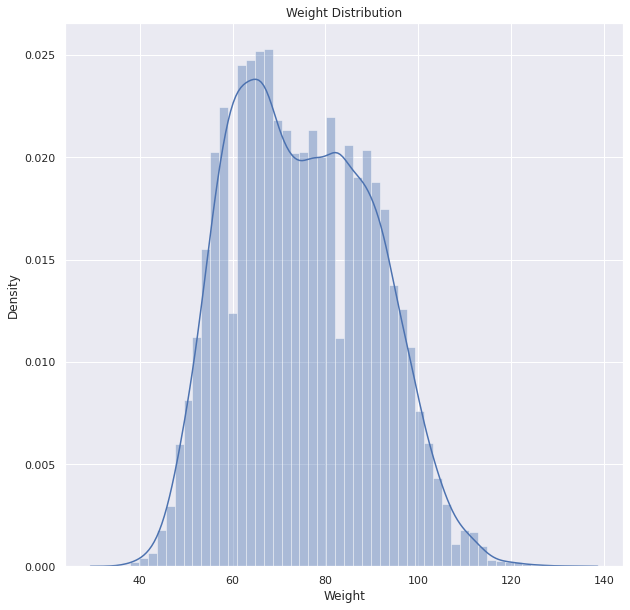

In [44]:
#Weight Distribution
plt.figure(figsize = (10,10))
sns.distplot(data['Weight'])
plt.title('Weight Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


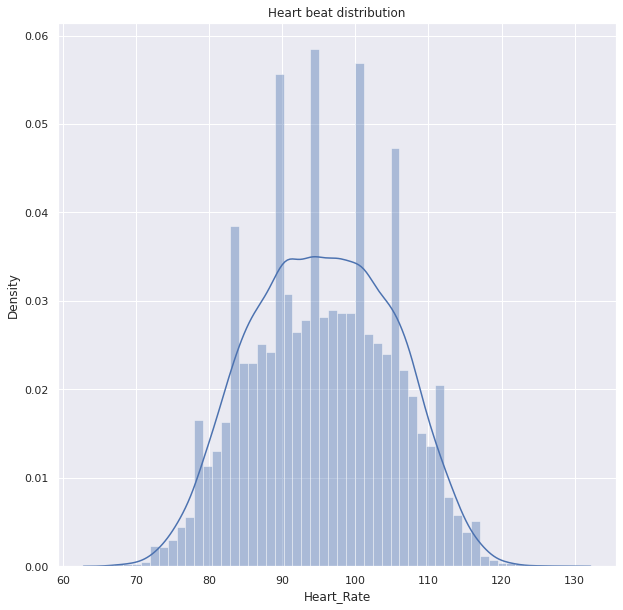

In [45]:
#Heart Rate Distribution
plt.figure(figsize = (10,10))
sns.distplot(data['Heart_Rate'])
plt.title('Heart beat distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


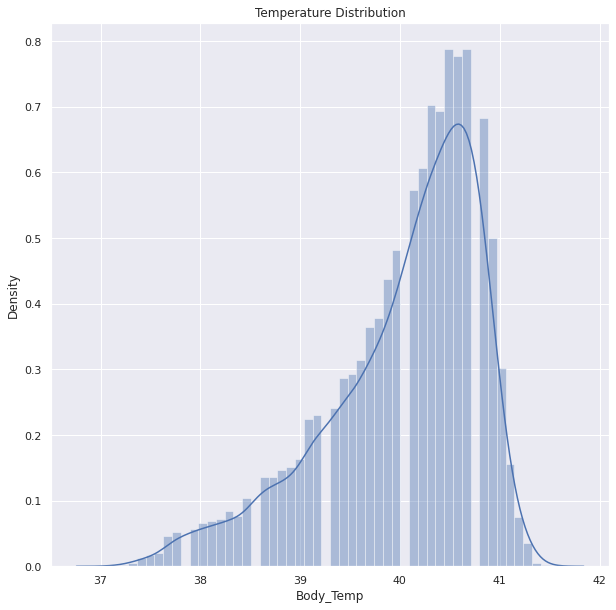

In [48]:
#Temperature Distribution
plt.figure(figsize = (10,10))
sns.distplot(data['Body_Temp'])
plt.title('Temperature Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


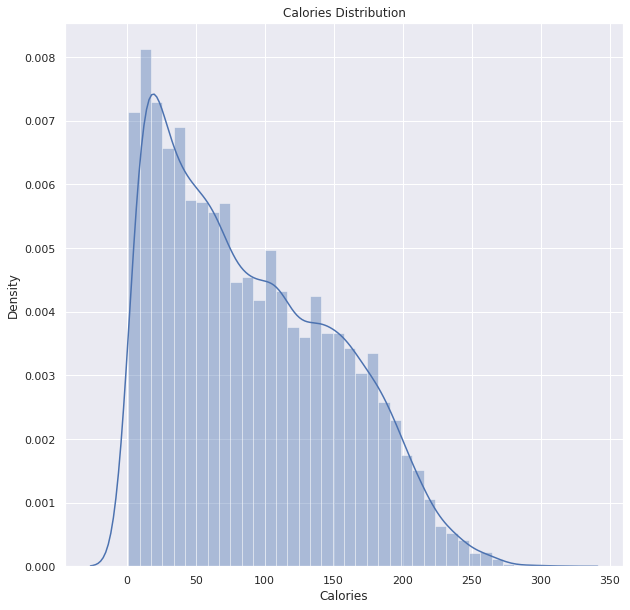

In [49]:
#Calories Distribution
plt.figure(figsize = (10,10))
sns.distplot(data['Calories'])
plt.title('Calories Distribution')
plt.show()

#Finding Correlation

In [50]:
correlation = data.corr()

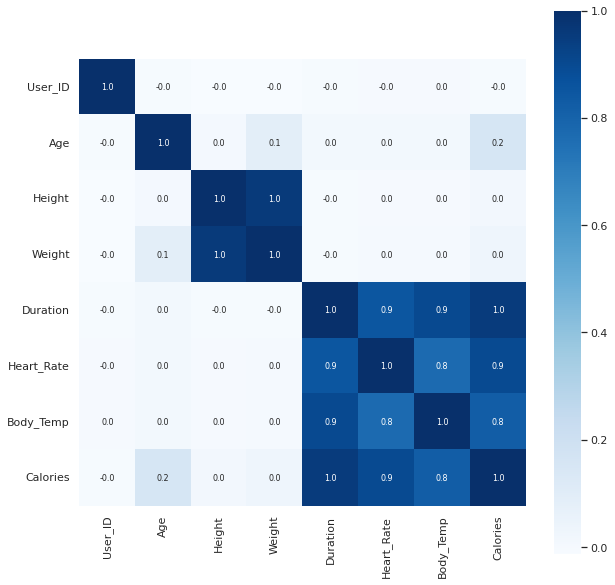

In [52]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt='.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [53]:
#Replacing Gender column values into numbers
data.replace({'Gender':{'male':0,'female':1}}, inplace = True)

#Splitting features and targets

In [61]:
x = data.drop(columns = ['User_ID','Calories'],axis = 1)
y = data['Calories']


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


#Splitting Train & Test Data

In [71]:
#By using train_test_split function , we are gonna split data
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 2)

In [72]:
print (x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(12000, 7) (12000,) (3000, 7) (3000,)


#Model Training

XGB Regressor

In [73]:
#Creating instance for regression model
reg = XGBRegressor()

In [74]:
#Fitting training data into model
reg.fit(x_train, y_train)


[10:04:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [75]:
#Prediction on training data
train_data_prediction = reg.predict(x_train)

In [76]:
#Using metrics module , we are check r2score , mean absolute error

train_r2_score = metrics.r2_score(y_train, train_data_prediction)

train_mean_error = metrics.mean_absolute_error(y_train, train_data_prediction)

print(train_r2_score , train_mean_error)

0.9966777021480265 2.5767704472566644


In [77]:
#Fitting Test data into model
reg.fit(x_test, y_test)

[10:04:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [78]:
#Prediction on Test data
test_data_prediction = reg.predict(x_test)

In [79]:
#Using metrics module , we are check r2score , mean absolute error

test_r2_score = metrics.r2_score(y_test, test_data_prediction)

test_mean_error = metrics.mean_absolute_error(y_test, test_data_prediction)

print(test_r2_score , test_mean_error)

0.9969987536090109 2.501628231684367


#Building Prediction System

In [97]:
k = np.array([[1,26,146,51,16,90,40.2]])
c = ['Gender', 	'Age', 	'Height', 	'Weight' ,	'Duration', 	'Heart_Rate', 	'Body_Temp']
input = pd.DataFrame(data = k , columns = c)

#Converting input data into numpy array
input_array = np.array(input)

#Reshaping for convinence of model
new_input = input_array.reshape(1,-1)
print(new_input)

#Predicting Calories Burnt
cal = reg.predict(new_input)
print('Calories Burnt :' , cal[0])

[[  1.   26.  146.   51.   16.   90.   40.2]]


ValueError: ignored